In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 6))

df = pd.read_csv('dataset.csv')

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int

In [2]:
initial_rows = len(df)
mileage_threshold = 200

df = df[df['mileage'] < mileage_threshold]
print(f"Removed {initial_rows - len(df)} rows due to high mileage.")

Removed 61 rows due to high mileage.


In [3]:
from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['year']

In [4]:
df['description'].fillna('', inplace=True)

keywords = ['Leather', 'Sunroof', 'Moonroof', 'Nav', '4x4', 'Turbo', 'Hybrid', 'AWD']

for keyword in keywords:
    df[f'has_{keyword.lower()}'] = df['description'].str.contains(keyword, case=False, regex=False).astype(int)

print(df[['name', 'has_leather', 'has_sunroof', 'has_turbo']].head())

                              name  has_leather  has_sunroof  has_turbo
0     2024 Jeep Wagoneer Series II            1            1          1
1  2024 Jeep Grand Cherokee Laredo            0            0          0
2         2024 GMC Yukon XL Denali            0            0          0
3       2023 Dodge Durango Pursuit            0            0          0
4            2024 RAM 3500 Laramie            0            0          0


C:\Users\Hp\AppData\Local\Temp\ipykernel_15972\124522420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


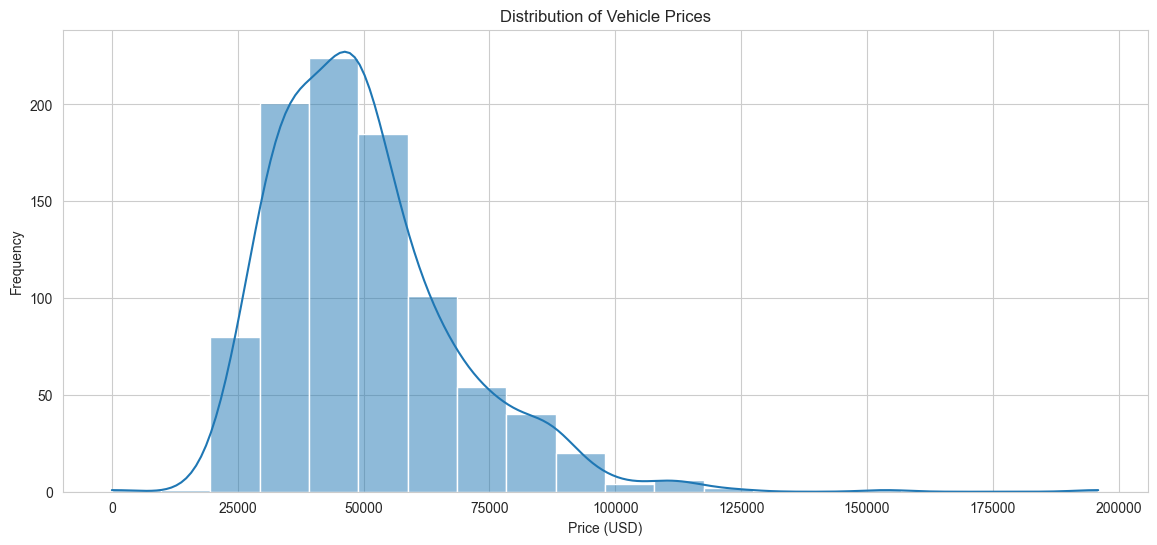

In [5]:
plt.figure(figsize=(14, 6))
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

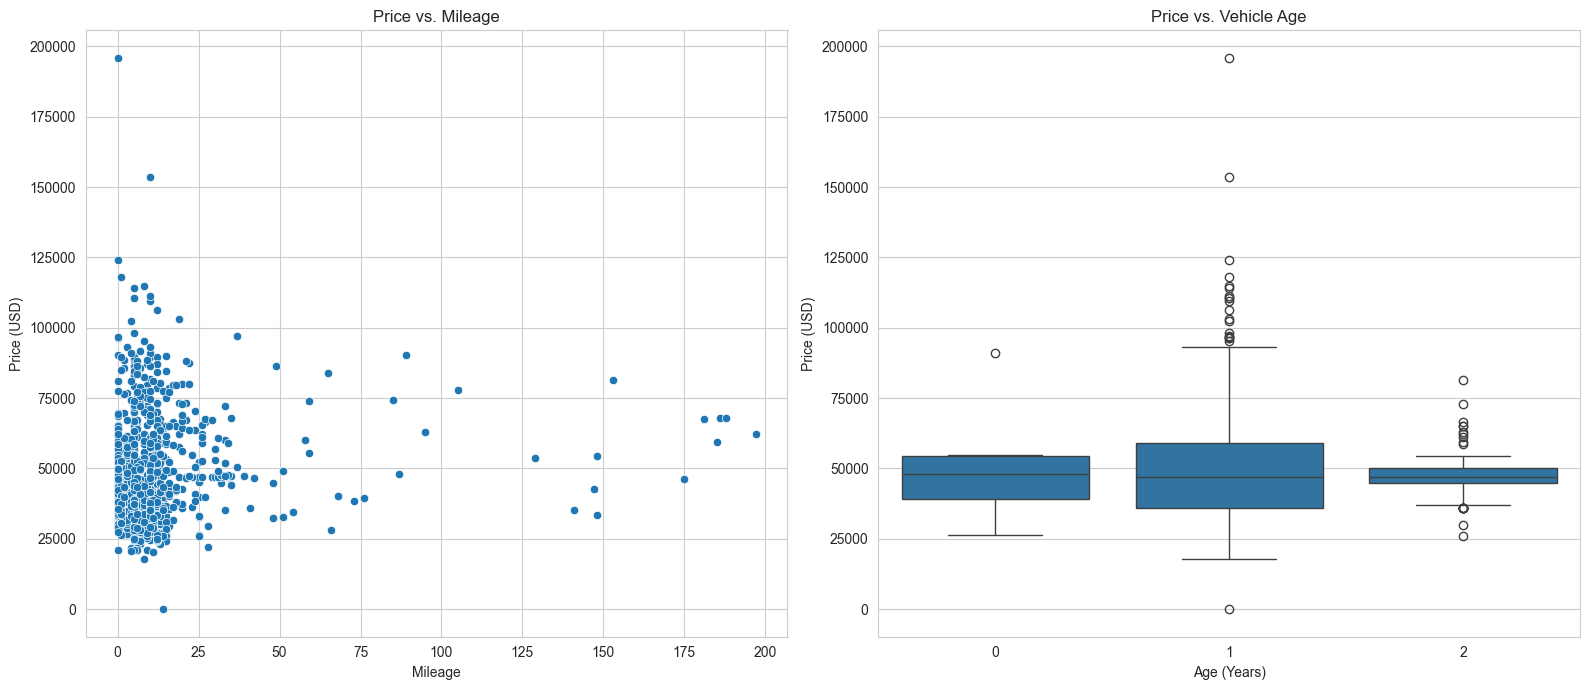

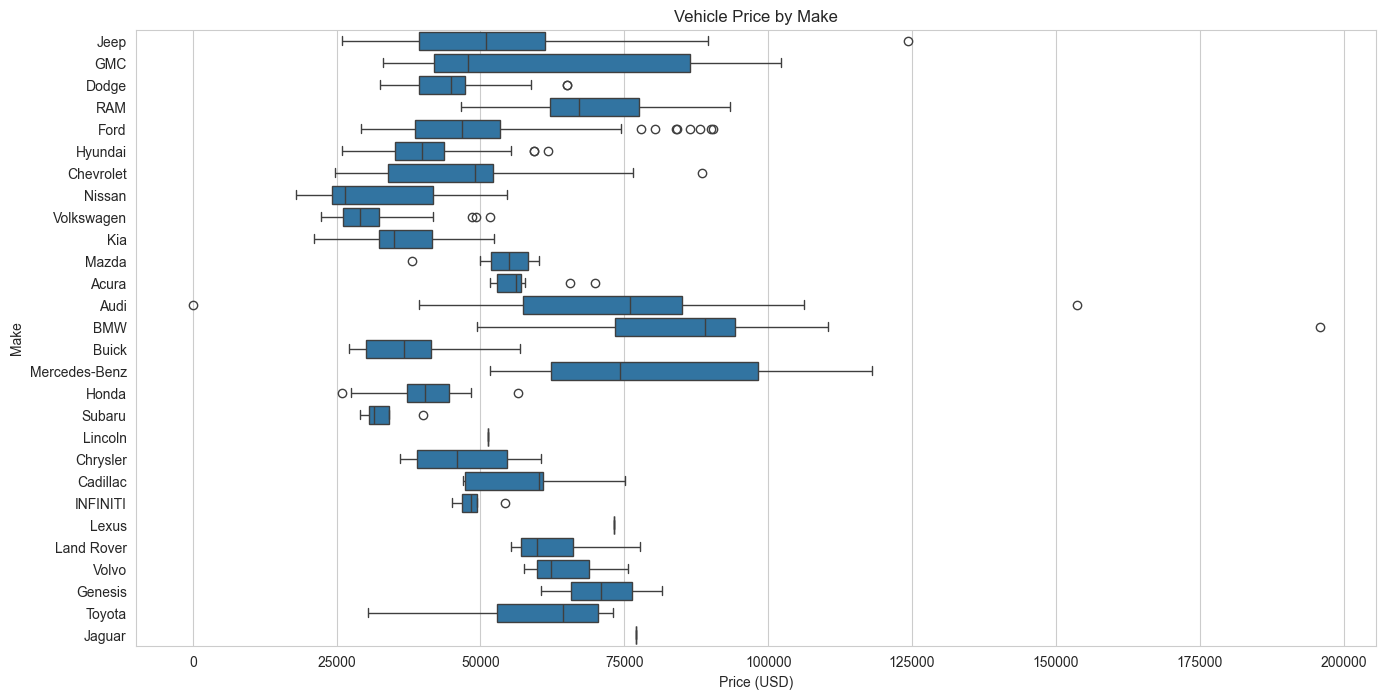

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.scatterplot(ax=axes[0], x='mileage', y='price', data=df)
axes[0].set_title('Price vs. Mileage')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Price (USD)')

sns.boxplot(ax=axes[1], x='age', y='price', data=df)
axes[1].set_title('Price vs. Vehicle Age')
axes[1].set_xlabel('Age (Years)')
axes[1].set_ylabel('Price (USD)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(x='price', y='make', data=df, orient='h')
plt.title('Vehicle Price by Make')
plt.xlabel('Price (USD)')
plt.ylabel('Make')
plt.show()

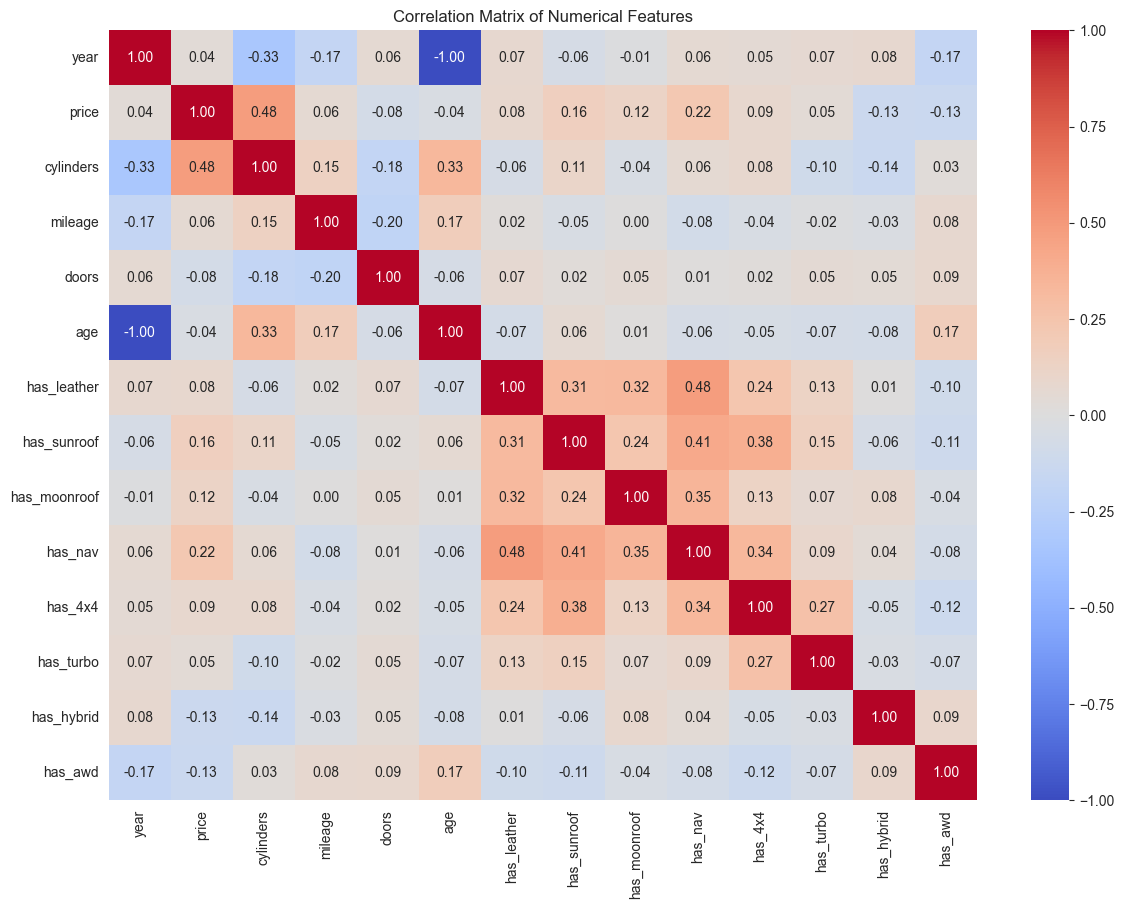

In [7]:
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
df_model = df.drop(['name', 'description', 'year', 'trim', 'exterior_color', 'interior_color'], axis=1)

X = pd.get_dummies(df_model.drop('price', axis=1), drop_first=True)
y = df_model['price']

In [9]:
X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]

print("Sample of cleaned feature names:")
print(X.columns[:5])

Sample of cleaned feature names:
Index(['cylinders', 'mileage', 'doors', 'age', 'has_leather'], dtype='object')


In [10]:
X.fillna(0, inplace=True)
print(f"Total NaNs remaining in feature matrix X: {X.isnull().sum().sum()}")

Total NaNs remaining in feature matrix X: 0


In [11]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 752, number of used features: 61
[LightGBM] [Info] Start training from score 48931.243351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(random_state=42)

In [21]:
import numpy as np

mask = ~np.isnan(y_test)
X_testc = X_test[mask]
y_testc = y_test[mask]

Model Performance:
  Mean Absolute Error (MAE): $6,598.55
  Root Mean Squared Error (RMSE): $10,789.97
  R-squared (R²): 0.67


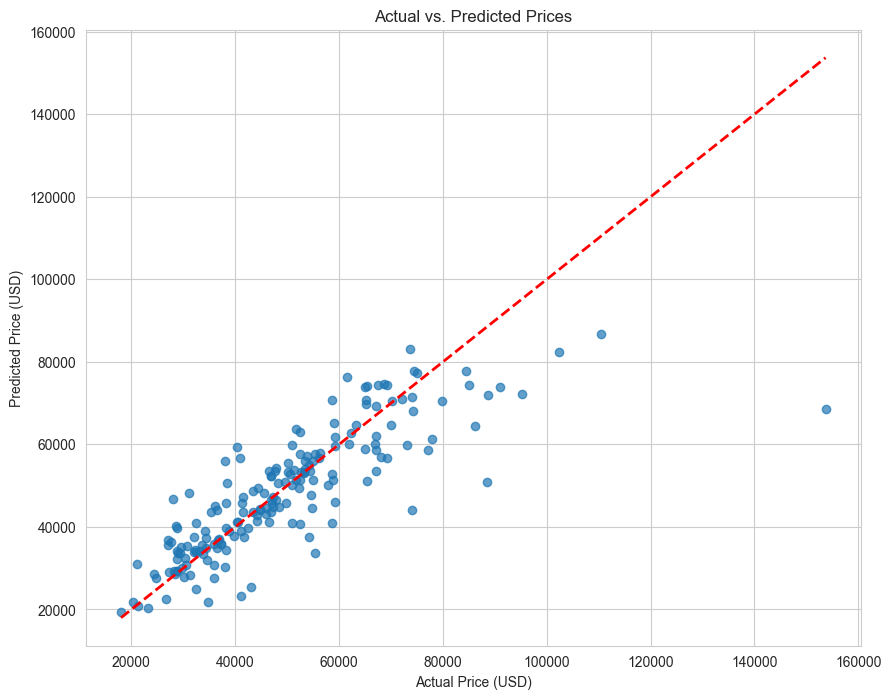

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lgbm.predict(X_testc)

mae = mean_absolute_error(y_testc, y_pred)
rmse = np.sqrt(mean_squared_error(y_testc, y_pred))
r2 = r2_score(y_testc, y_pred)

print(f"Model Performance:")
print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"  R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 8))
plt.scatter(y_testc, y_pred, alpha=0.7)
plt.plot([y_testc.min(), y_testc.max()], [y_testc.min(), y_testc.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.show()

In [25]:
import joblib

joblib.dump(lgbm, 'vehicle_price_model.pkl')


['vehicle_price_model.pkl']